![title](eda.png)

# Exploratory Data Analysis (EDA).

**Here we conducted data analysis on Japan's tourists datasets.**

**We extracts useful insights from these datasets and a short report was written to summarized our findings.**

### Load required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from pandas_profiling import profile_report

### Read the data 1


In [2]:
item_meaning = pd.read_csv('ItemMaster.csv')
item_meaning

,ItemCode,ItemName
0,1,Cosmetics and Perfume
1,2,Food Drink Alcohol and Tobacco
2,3,Confectionery
3,4,Baby goods
4,5,Pharmaceuticals Health-goods Toiletries
5,6,Kitchen utensils
6,7,Appliance
7,8,Folk art
8,9,Manga and Character goods
9,10,Books except Manga


### Read the data 2

In [3]:
shop_meaning = pd.read_csv('ShopMaster.csv')
shop_meaning

,ShopCode,ShopName
0,1,convenience store
1,2,super market
2,3,department store
3,4,discount shop
4,5,Drug store
5,6,Consumer electronics store
6,7,Souvenir shop
7,8,Duty-free shop
8,9,Others


### Read the data 3

In [4]:
Purchase_df = pd.read_csv('PurchaseData.csv')
Purchase_df.head()

,ID,Month_To_Japan,ShopCode,ItemCode,Amount
0,AM10002,1,1,2,2300
1,AM10002,1,1,3,800
2,SP20004,1,1,3,800
3,SP50006,1,1,3,900
4,TH30008,1,1,3,900


### Read the data 4

In [5]:
Tourist_df = pd.read_csv('TouristData.csv')
Tourist_df.head()

,TouristID,Country,Month_To_Japan,Age,SightSeeing_Nature,SightSeeing_City,Shopping_quality,Shopping_resale,Emigration
0,TW10068,Taiwan,1,48,3,5,1,1,1
1,HK40048,HongKong,1,25,3,4,4,1,1
2,TH30012,Thailand,1,46,3,4,4,1,1
3,CH40089,China,1,50,4,3,2,1,1
4,HK60047,HongKong,1,41,3,3,2,4,1



## Joining data by attaching code's label to the Purchase dataset

### Method 1 : (using pandas merge function)

In [6]:
# Merge ShopMaster database to purchase dataframe:
Purchase_df = Purchase_df.merge(shop_meaning, left_on='ShopCode', right_on='ShopCode') 

# Merge ItemMaster database to purchase dataframe :
Purchase_df = Purchase_df.merge(item_meaning, left_on='ItemCode', right_on='ItemCode') 
Purchase_df.head()

,ID,Month_To_Japan,ShopCode,ItemCode,Amount,ShopName,ItemName
0,AM10002,1,1,2,2300,convenience store,Food Drink Alcohol and Tobacco
1,TH80010,1,1,2,5200,convenience store,Food Drink Alcohol and Tobacco
2,KR60038,1,1,2,4500,convenience store,Food Drink Alcohol and Tobacco
3,KR10040,1,1,2,3500,convenience store,Food Drink Alcohol and Tobacco
4,TW60064,1,1,2,4100,convenience store,Food Drink Alcohol and Tobacco


### Method 2 :  ( code from the scratch using map function)

In [7]:
Purchase_df = pd.read_csv('PurchaseData.csv')

# Create a dictionary for shopCode  {key:value} = {shopCode : meaning}
maps_dict_shop = {code: label for index, code, label in shop_meaning.to_records()}
# Create a dictionary for itemCode  {key:value} = {itemCode : meaning}
maps_dict_item = {code: label for index, code, label in item_meaning.to_records()}

# Map shopCode to its meaning 
shop_code_label = Purchase_df['ShopCode'].map(maps_dict_shop)
# Map itemCode to its meaning 
Item_Code_label = Purchase_df['ItemCode'].map(maps_dict_item)

Purchase_df['ShopCode_label'] = shop_code_label # Add shopCode meaning to the Purchase dataframe
Purchase_df['ItemCode_label'] = Item_Code_label # Add itemCode meaning to the Purchase dataframe

Purchase_df = Purchase_df[['ID', 'Month_To_Japan', 'ShopCode',
       'ShopCode_label', 'ItemCode', 'ItemCode_label', 'Amount']] # rearrage the columns in nice order.

Purchase_df.head()

,ID,Month_To_Japan,ShopCode,ShopCode_label,ItemCode,ItemCode_label,Amount
0,AM10002,1,1,convenience store,2,Food Drink Alcohol and Tobacco,2300
1,AM10002,1,1,convenience store,3,Confectionery,800
2,SP20004,1,1,convenience store,3,Confectionery,800
3,SP50006,1,1,convenience store,3,Confectionery,900
4,TH30008,1,1,convenience store,3,Confectionery,900


# Explore Tourists dataset.

### Japan's Tourists Age

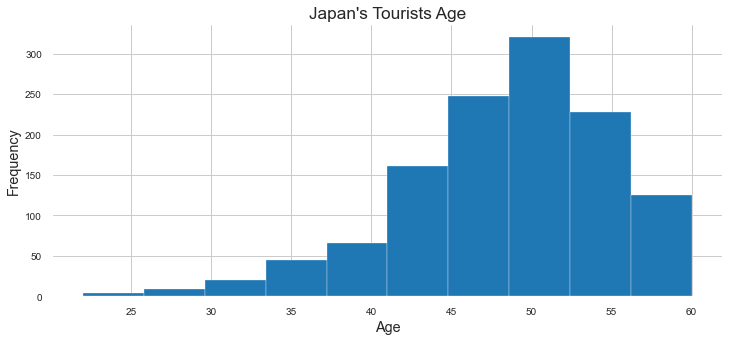

In [22]:
plt.figure(figsize = (12,5))
Tourist_df.Age.hist()
plt.title('Japan\'s Tourists Age',fontsize = 'xx-large')
plt.xlabel('Age',fontsize = 'x-large')
plt.ylabel('Frequency',fontsize = 'x-large')
plt.show()

#### ***Remark***
    
* #### Most tourists in Japan are usually within Age range 45 to 55 years

### Population of Tourist from Different Country Per Month

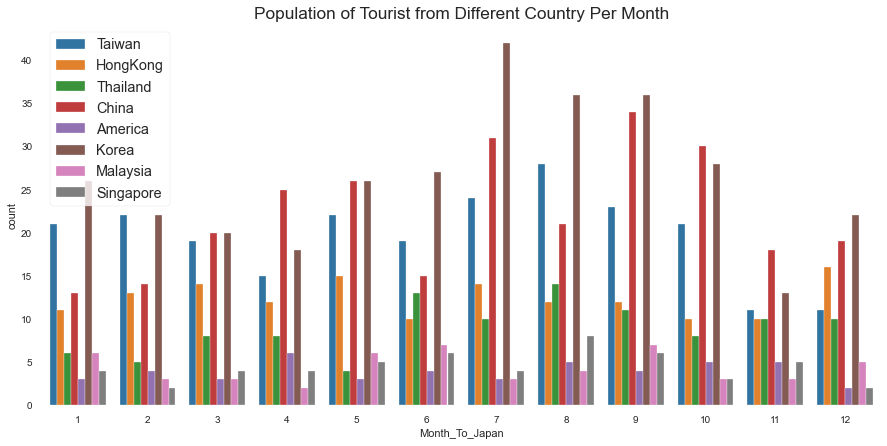

In [9]:
plt.figure(figsize = (15,7))
sn.countplot(x = 'Month_To_Japan', hue = 'Country', data=Tourist_df)
plt.legend(loc = 'upper left' ,fontsize = 'x-large')
plt.title('Population of Tourist from Different Country Per Month',fontsize = 'xx-large')
plt.show()

#### ***Remarks***
* ####  Every month the population of 3 countries (Korea, China, Taiwan) stands out among the 8 countries <br> from which the tourists had come from.
* #### Starting from 7th to 9th month the population of the Korean, the Chinese, and the Taiwanese tourists was at its peak.


### Tourist Population by Country

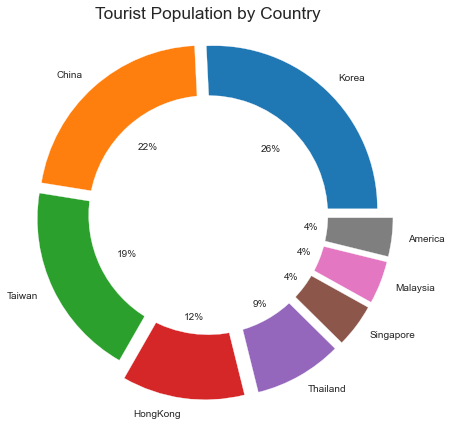

In [10]:
country_label = Tourist_df.Country.value_counts().keys()        # all countries label
country_count = [i for i in Tourist_df.Country.value_counts()]  # count per country saved in a list

explode = [0.08,0.08, 0.08,0.2,0.2,0.2,0.2,0.2]  # to Create cracks on the pie chart

plt.figure(figsize = (10,5))
plt.title('Tourist Population by Country',fontsize = 'xx-large', pad = 60)
plt.pie(country_count,labels = country_label,
        radius = 1.5, autopct = '%1.0f%%', explode = explode,
        pctdistance=0.5 )
plt.pie(country_count,radius = 1.1,colors = 'w') # to put white a
plt.show()

#### ***Remark***
    
* #### Most tourists in Japan are from Korea, China and Taiwan, and they account for 67% of tourists population in japan.

### Most Visited Sigtseeing City Per Month

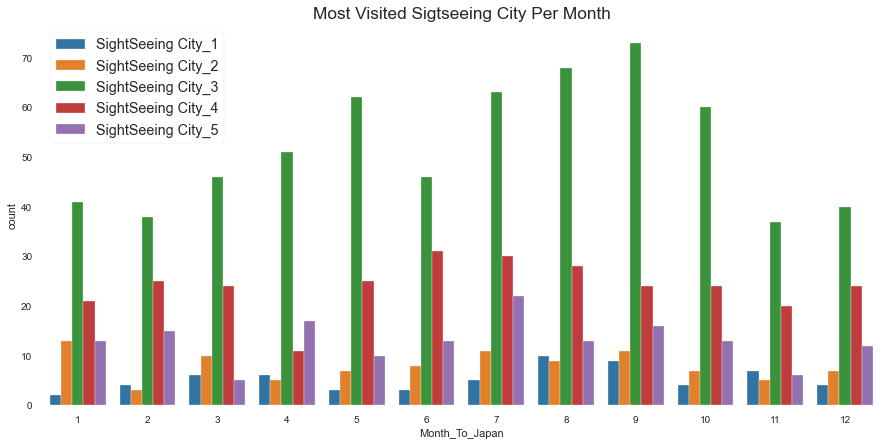

In [11]:
labels = ['SightSeeing City_1','SightSeeing City_2','SightSeeing City_3','SightSeeing City_4','SightSeeing City_5']

plt.figure(figsize = (15,7))
plt.title('Most Visited Sigtseeing City Per Month',fontsize = 'xx-large')
sn.countplot(x = 'Month_To_Japan', hue = 'SightSeeing_City', data=Tourist_df)
plt.legend(labels,loc = 'upper left' ,fontsize = 'x-large')
plt.show()

#### ***Remarks***
    
* #### City_3 is the most visted sightSeeing city in japan followed by city_4, second most visited. 
* #### Every month both cities have higher polulation of visitors compared to others. 

### Overall Most Visited Sigtseeing City

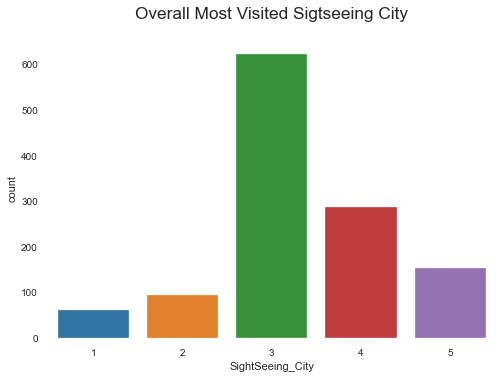

In [12]:
sn.countplot(x = 'SightSeeing_City', data=Tourist_df)
plt.title('Overall Most Visited Sigtseeing City',fontsize = 'xx-large', pad = 20)
plt.show()

#### ***Remark***
    
* #### City_3 is the most visited SightSeeing city in japan.

### SightSeeing City Visited by Tourists from Different Countries

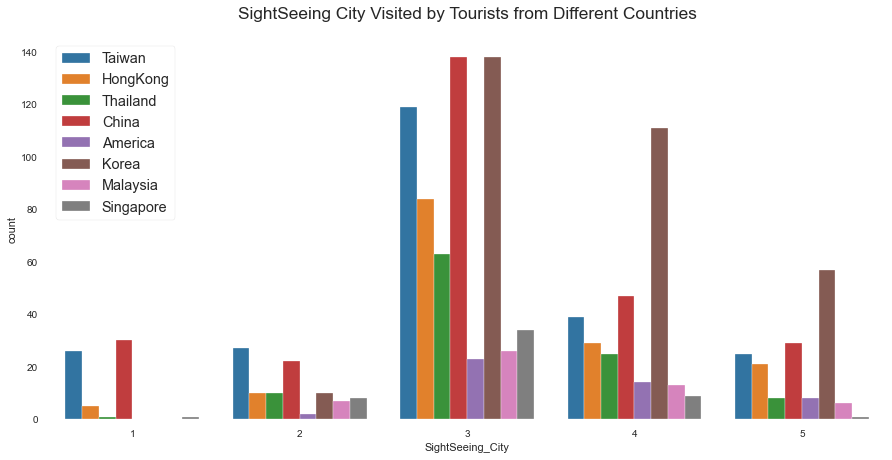

In [13]:
plt.figure(figsize = (15,7))
plt.title('SightSeeing City Visited by Tourists from Different Countries',fontsize = 'xx-large', pad = 20)
sn.countplot(x = 'SightSeeing_City', hue = 'Country', data=Tourist_df)
plt.legend(loc = 'upper left' ,fontsize = 'x-large')
plt.show()

#### ***Remark***
    
*  **Tourists from Korea, China and Taiwan are the top visitors of sightseeing_city 3 in term of huge polulation.**

### Items Bought from each Shop by Tourists

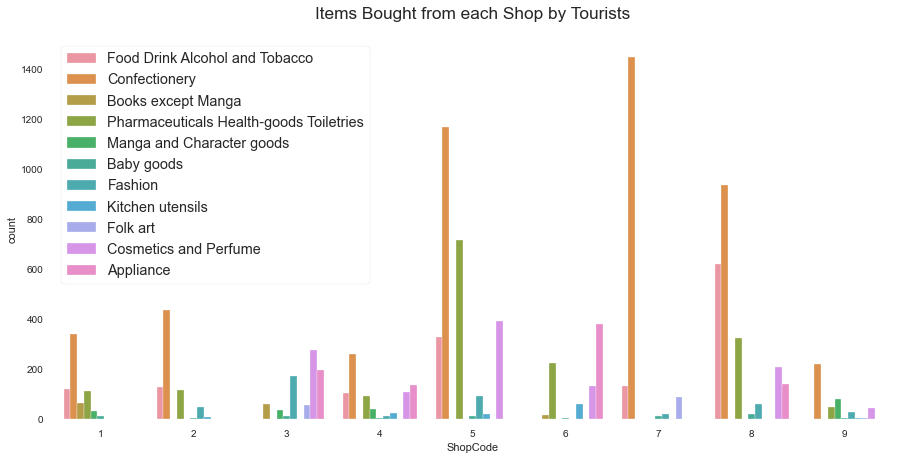

In [14]:
plt.figure(figsize = (15,7))
plt.title('Items Bought from each Shop by Tourists',fontsize = 'xx-large', pad = 20)
sn.countplot(x = 'ShopCode', hue = 'ItemCode_label', data=Purchase_df)
plt.legend(loc = 'upper left' ,fontsize = 'x-large')
plt.show()

#### ***Remarks***
    
* #### Tourists buys Confectionery product more frequent than other items across all shops
* #### ShopCode 5 ,7 , 8 has the highest sales of confectionery products

# Explore Purchase dataset

### Items Bought by Tourists Per Month

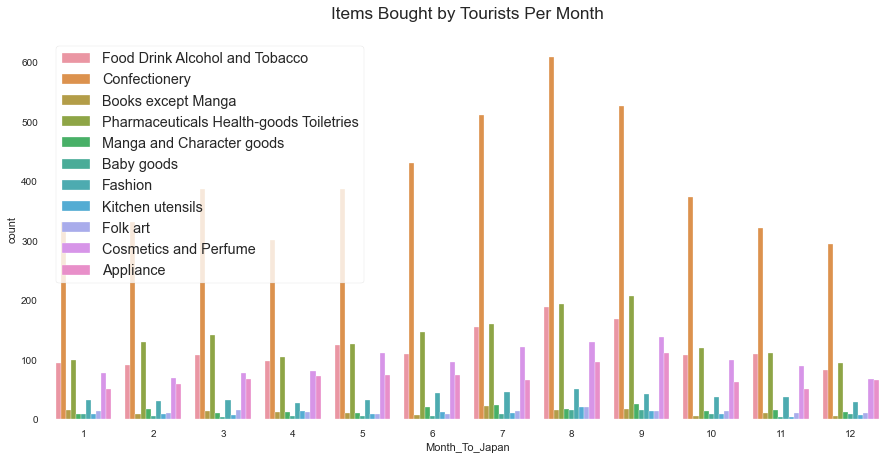

In [15]:
plt.figure(figsize = (15,7))
plt.title('Items Bought by Tourists Per Month',fontsize = 'xx-large', pad = 20)
sn.countplot(x = 'Month_To_Japan', hue = 'ItemCode_label', data=Purchase_df)
plt.legend(loc = 'upper left' ,fontsize = 'x-large')
plt.show()


#### ***Remarks***
    
* #### Every months confectionery products have high sales than every other products bought by tourists.
* ####  Starting from the 6th to 9th months, Tourists buy more confectionery products.


### Table to distplay Overall total sales on each item

In [16]:
item_meaning.columns = ['ItemCode', 'ItemCode_label'] 

# group items and sum the amount of each item in the purchase dataset
total_amount_item = pd.DataFrame(Purchase_df.groupby('ItemCode_label').sum()['Amount'].nlargest(11))
# merge total_amount_item dataframe and item_meaning datafram on common column: ItemCode_label.
sum_items = pd.merge(total_amount_item,item_meaning,left_on='ItemCode_label',right_on='ItemCode_label', how = 'left')
print()
#sum amount of all items
print('Annual sales of items in Japan : Japanese Yen {}'.format(sum_items.Amount.sum())) 

sum_items # dataframe


Annual sales of items in Japan : Japanese Yen 76241100


,ItemCode_label,Amount,ItemCode
0,Appliance,25388300,7
1,Fashion,18144800,11
2,Pharmaceuticals Health-goods Toiletries,13121800,5
3,Cosmetics and Perfume,6998900,1
4,Food Drink Alcohol and Tobacco,5731900,2
5,Confectionery,3849000,3
6,Kitchen utensils,1824100,6
7,Manga and Character goods,381600,9
8,Folk art,311000,8
9,Books except Manga,306100,10


#### ***Remarks***
    
* #### Tourists in japan spend approximately 76 millions Japanese Yen annually.
* #### The table above present tourists' annual spendings in ascending order.

### Annual Income Per Item Sold

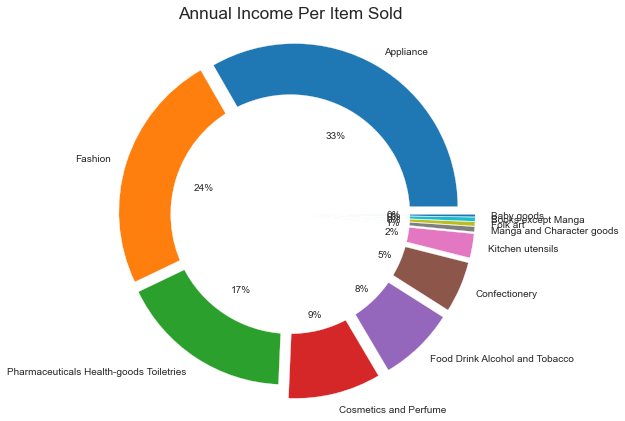

In [17]:
label = [0.08,0.08, 0.08,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2]

plt.figure(figsize = (10,5))
plt.title('Annual Income Per Item Sold',fontsize = 'xx-large', pad = 60)
plt.pie(sum_items['Amount'],labels = sum_items.ItemCode_label,   # annual income per item
        radius = 1.5, autopct = '%1.0f%%', explode = label,
        pctdistance=0.5 )
plt.pie(sum_items['Amount'],radius = 1.1,colors = 'w')
plt.show()

#### ***Remarks***
    
* #### Tourists spend 33% of their annual spendings on Appliance,<br><br> 24% on Fashionand and 17% on phamaceuticals Health-goods Toletries

### Most Frequent Bought Item

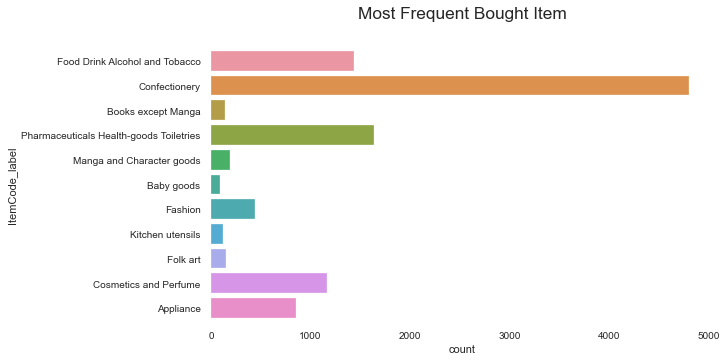

In [19]:
plt.figure(figsize = (9,5))
sn.countplot(y = 'ItemCode_label',data=Purchase_df)
plt.title('Most Frequent Bought Item',fontsize = 'xx-large', pad = 30)
plt.show()

#### ***Remark***
    
* ### Confectionery products are the most bought item by tourists.

# Report Summary :

* ### What kind of persons came:
    Japan is visited by tourists mostly from Asia countries.
    the polulation of tourists visiting japan in a year is about 1226 people. <br>
    Most tourists in Japan are usually from Korea, China and Taiwan, and they account 
    for 67% of tourists population in japan.<br>
    in general, tourists in japan are usually within the age range of 45 to 55 years.
    
* ### What place: 
 
    Tourists are offen attracted to SightSeeing cities in japan.
    Among the five (5) sightseeing cities in japan, City_3 is the most
    visted <br>sightSeeing city in japan follow by city_4. 
    Tourists from Korea, China and Taiwan are the top visitors of city 3 in term of polulation.
    
* ### At what time:

    Every month the population of tourists from these three (3) 
    countries (Korea,China,Taiwan) stands out among the 8 tourists countries.
    <br>   Starting from 7th to 9th month the population of tourists is usually high compared to every
    other months. This increase is as a result <br>  of tourists population from Korea, China and Taiwan.
    
* ### What kind of thing are they buying:

    Tourists spends the sum total of 76,241,100 Japanese Yen anually on different items across all shops.
    As shown in the pie chart,<br> tourists spends about 33% of their annual spendings on Appliance, 24% on Fashion, 
    17% on Pharmaceuticals Health-goods Toiletries <br> and 26% consist of other items.
    The importance of Confectionery product can not be overemphasized as they are the most bought item. 

* ### Present one feature of consumption trend: (confectionery products)

    Confectionery products are non-durable product. tourists are more likely to buy non-durable products because 
    they want products  <br> they can use within a short period. Every months confectionery products are highly
    patronized by tourists making it the most single <br> bought item across all months. its sales usually rose to its 
    peak starting from the 6th to 9th months of the year. Confectionery products <br>have good consumption trend across         each month of the year.

#  Bonus Task
* ## Perform a task with query function in pandas and execute that same task <br> without the query function

## Task:
* **Select shopcode==2 with Amount within the range of 1000 to 2000**

In [22]:
Purchase_df.head() # datafram

,ID,Month_To_Japan,ShopCode,ShopCode_label,ItemCode,ItemCode_label,Amount
0,AM10002,1,1,convenience store,2,Food Drink Alcohol and Tobacco,2300
1,AM10002,1,1,convenience store,3,Confectionery,800
2,SP20004,1,1,convenience store,3,Confectionery,800
3,SP50006,1,1,convenience store,3,Confectionery,900
4,TH30008,1,1,convenience store,3,Confectionery,900


### Method one: (Query function)

In [23]:
Purchase_df.query("1000 <= Amount <= 2000 & ShopCode == 2").head()

,ID,Month_To_Japan,ShopCode,ShopCode_label,ItemCode,ItemCode_label,Amount
728,CH90083,1,2,super market,3,Confectionery,1000
787,SP50180,3,2,super market,3,Confectionery,1100
798,ML70192,3,2,super market,3,Confectionery,1000
837,TW00243,3,2,super market,2,Food Drink Alcohol and Tobacco,1700
938,CH50448,5,2,super market,3,Confectionery,1000


### Method Two : (without Query function)

In [24]:
Purchase_df.loc[(Purchase_df['Amount'] >= 1000) & (Purchase_df['Amount'] <=2000) & (Purchase_df['ShopCode'] == 2) ].head()

,ID,Month_To_Japan,ShopCode,ShopCode_label,ItemCode,ItemCode_label,Amount
728,CH90083,1,2,super market,3,Confectionery,1000
787,SP50180,3,2,super market,3,Confectionery,1100
798,ML70192,3,2,super market,3,Confectionery,1000
837,TW00243,3,2,super market,2,Food Drink Alcohol and Tobacco,1700
938,CH50448,5,2,super market,3,Confectionery,1000
